<a href="https://colab.research.google.com/github/jypkec/Tutorial/blob/master/Pretrained_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import models

사전훈련된 여러가지 모델들을 가저오는 과정

In [2]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [3]:
resnet = models.resnet101(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [4]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
from torchvision import transforms
preprocess =transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225])])

In [6]:
from PIL import Image
img =Image.open("/content/pallet.jpeg")

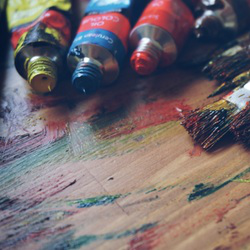

In [7]:
img

In [8]:
img_t = preprocess(img)

In [9]:
import torch
batch_t= torch.unsqueeze(img_t,0)

In [10]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
out=resnet(batch_t)
out

tensor([[-1.3110e+00,  1.4705e+00, -9.9873e-01, -3.9857e+00,  1.4002e-01,
         -2.4219e+00, -3.0490e+00,  9.3162e-02, -3.4139e+00, -4.3762e+00,
         -2.3602e+00, -2.2872e+00, -2.1077e+00, -3.5755e+00, -3.2960e+00,
         -1.9852e+00, -1.6865e+00, -3.5674e+00, -3.0166e+00, -3.3430e+00,
         -4.3745e+00, -3.0853e+00, -2.0459e+00, -2.1345e+00, -3.5050e+00,
          1.0083e+00, -2.2142e+00,  5.0520e-01,  1.2412e+00, -3.8937e+00,
         -1.2487e+00, -8.7387e-01, -1.4968e+00, -2.0725e-01, -4.7905e-02,
         -1.0481e+00, -3.0139e-01, -1.2074e-01,  3.4519e-02, -2.2333e-01,
         -1.9698e+00, -3.1415e+00, -3.6664e+00, -4.1679e+00, -4.8788e-01,
          2.3536e-01, -1.3962e+00, -3.5484e+00,  4.6132e-01, -5.8917e-02,
         -1.4230e+00, -2.7254e+00, -6.2622e-01,  1.9324e+00, -1.9202e+00,
         -8.8916e-01,  2.6014e+00, -4.4380e-01, -1.2985e+00, -2.6710e+00,
         -1.1508e+00, -1.0384e-01, -2.5522e+00, -1.0248e+00, -2.6412e+00,
          8.5488e-01, -1.4779e+00, -7.

In [12]:
with open('../datalab/p1ch2/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

FileNotFoundError: ignored

resnet에 저장된 레이블 뽑아내는 과정인데, 파일링크가 잘못됨... 어디있는지 모르겠으... ㅠ

In [13]:
_, index = torch.max(out,1)

In [16]:
percentage= torch.nn.functional.softmax(out,dim=1)[0]*100
